In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Suppose you're working with a grocery store who recently installed 6 self checkout registers. As part of your work, you've collected the following data, which shows information on register usage and profit. Below are some clarifications on the data:

- Each # in the dataset corresponds to a register # (1-6) and each row represents an individual usage of the register
- The 'profit' field represents the profit the store made from the customer checking out at the associated register (you can assume the profit is random in the data).

Using all of this information, write code to visualize the Probability Mass Function (PMF) of your customers' register usage. Your resultant chart should show each spot # (1-12) along with the probability of that spot being chosen based on your dataset. 
- Additionally, calculate the register with the highest total profit and the highest profit per use.

In [16]:
path = 'https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/register_usage_info.csv'
df = pd.read_csv(path)

In [22]:
cash_register_array = df['cash_register'].values

count = {}

#For each value in data
for i in cash_register_array:
    #If the value is not in the dictionary, add it
    count[i] = count.get(i, 0) + 1

#Calculate the n of observations
n = len(cash_register_array)

probability_mass_function = {}

for unique_value, count in count.items():
    probability_mass_function[unique_value] = count / n

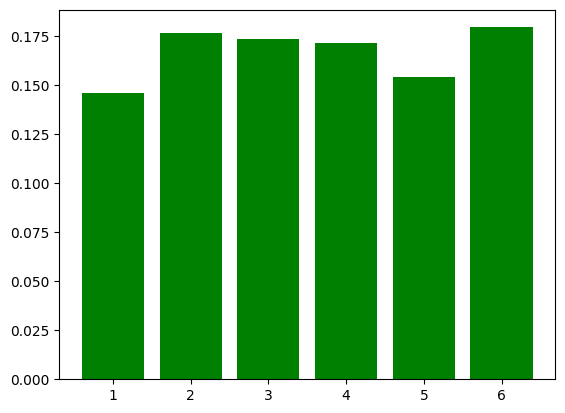

In [23]:
plt.bar(list(probability_mass_function.keys()), probability_mass_function.values(), color='g')
plt.show()  

In [26]:
# Pivot to show us the profit and number of utilizations 
# per register
df = df.groupby('cash_register').agg(profit=('profit', 'sum'), num_uses=('profit', 'count')).reset_index()
# Add in a column to calculate the profit per use
df['profit_per_use'] = df['profit'] / df['num_uses']
# Sort by the highest earning registers
df = df.sort_values(by='profit', ascending=False)
df.head(20)        

,cash_register,profit,num_uses,profit_per_use
3,4,5425.791,169,32.105272
5,6,5358.969,177,30.276661
1,2,4981.347,174,28.628431
2,3,4971.246,171,29.071614
4,5,4501.161,152,29.612901
0,1,3996.888,144,27.756167
